# Random Forest



<center><img src="https://camo.githubusercontent.com/5afa4bc35f56871811e34f442baacc6cc098bd12a9320062846efe1bed011275/68747470733a2f2f33312e6d656469612e74756d626c722e636f6d2f37393637306561626539336364643434386331356635626362313938643066622f74756d626c725f696e6c696e655f6e386533393859624b76317330347263332e706e67" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>camo.githubusercontent.com</small>
</div>




© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

## Learning Objectives

1. [Basics of Random Forest](#Basics-of-Random-Forest)
2. [Using Random Forest for Classification](#Using-Random-Forest-for-Classification)
3. [Regression with Random Forest](#Regression-with-Random-Forest)


## Basics of Random Forest

Random Forest is a powerful ensemble learning method used in both classification and regression tasks. It is based on decision trees and combines multiple decision trees to improve predictive accuracy and reduce overfitting.


**Decision Trees**
- Random Forest is built on the foundation of decision trees. Decision trees are a simple yet effective machine learning model used for classification and regression tasks. They make decisions by recursively splitting data based on feature values.

**Ensemble Learning**

- Random Forest is an ensemble learning technique, which means it combines the predictions of multiple models to make more accurate predictions. In this case, the ensemble consists of many decision trees.

**Bootstrap Aggregating (Bagging)**

- Random Forest uses a technique called bagging, which involves training each decision tree on a different subset of the data. This helps reduce overfitting and improve the model's robustness.


### Random Forest algorithm

<center><img src="https://www.ejable.com/wp-content/uploads/2022/04/Random-forest-5.webp" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>www.ejable.com</small>
</div>



1. **Bootstrapping**: Randomly select data points with replacement from the training dataset to create multiple subsets for training each decision tree.

2. **Feature Randomization**: Randomly select a subset of features for each decision tree. This ensures diversity among the trees.

3. **Tree Building**: For each subset of data, build a decision tree by selecting the best split at each node, considering a random subset of features.

4. **Voting or Averaging**: For classification tasks, the final prediction is determined by a majority vote from all decision trees. For regression tasks, predictions are averaged.



- Random Forest is robust and less prone to overfitting.
- It can handle both classification and regression problems.
- It provides feature importances, allowing you to understand the most relevant features in your dataset.
- Random Forest models can be computationally expensive, especially when dealing with a large number of trees and features.
- Interpretability can be a challenge when using a large Random Forest.



## Using Random Forest for Classification

In this section, we will utilize the Random Forest classifier from scikit-learn to classify materials in the Bandgap dataset as either metals or insulators/semiconductors.

- **Semiconductor**: A material with a small band gap, typically between 0.5 and 3 electronvolts (eV), allowing it to conduct electricity at higher temperatures than insulators but less effectively than metals.

- **Metal**: A material with no band gap or a very small one, allowing it to conduct electricity efficiently.

- **Insulator**: A material with a large band gap, typically exceeding 3 eV, making it a poor conductor of electricity.




#### Load the dataset

In [1]:
import numpy as np
import pandas as pd

data =  pd.read_csv('band_Gap.csv')

data.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,band_gap
0,2.500000,89.500000,4.257630,26.270000,4.500000,1.250000,41.000000,2.410000,1.250000,0.750000,...,0.750000,0.750000,0.0,0.0,1.500000,8.653437,7.499000,0.0,194.000000,4.3412
1,10.000000,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.000000,3.000000,...,0.000000,3.000000,0.0,0.0,3.000000,17.694308,4.632500,0.0,122.000000,3.5600
2,6.000000,61.750000,12.240275,160.710000,11.500000,2.000000,85.250000,2.525000,1.750000,2.250000,...,0.250000,2.250000,0.0,0.0,2.500000,15.224896,4.827750,0.0,202.750000,3.6643
3,9.333333,60.666667,18.701880,135.113333,6.000000,2.333333,100.000000,2.153333,1.333333,1.333333,...,0.666667,0.666667,0.0,0.0,1.333333,29.608889,2.617667,0.0,145.000000,3.6839
4,10.000000,84.000000,20.326621,145.050000,15.333333,2.333333,81.333333,2.890000,2.000000,3.333333,...,0.000000,2.666667,0.0,0.0,2.666667,15.481329,2.687333,0.0,69.333333,5.1829


In [2]:
data.shape

(479, 23)

Now let's determine which materials are metals and which ones are insulators or semiconductors

(array([355.,  33.,  25.,  17.,  15.,  13.,  13.,   4.,   2.,   2.]),
 array([0.     , 0.74631, 1.49262, 2.23893, 2.98524, 3.73155, 4.47786,
        5.22417, 5.97048, 6.71679, 7.4631 ]),
 <BarContainer object of 10 artists>)

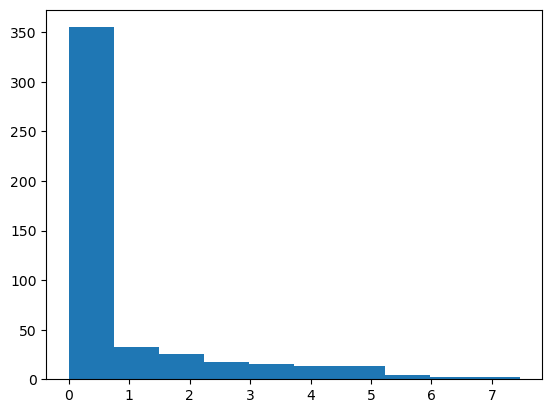

In [3]:
import matplotlib.pyplot as plt

plt.hist(data.band_gap)

In [4]:
len(data.band_gap)

479

In [5]:
metal_index = np.where(data.band_gap <0.5)[0].tolist()

semicond_index = np.where((0.5<data.band_gap)&(data.band_gap <3))[0].tolist()

len(metal_index),len(semicond_index)

(343, 87)

Since there is a significant difference in the size of the classes, we will attempt to reduce the imbalance by selecting a subset of the metals in the dataset

In [6]:
from random import shuffle

shuffle(metal_index)
metal_index_subset = metal_index[:100]

total_index = metal_index_subset+semicond_index

# Class labels

labels = np.empty(data.shape[0])
labels[ metal_index_subset] = 0
labels[semicond_index] = 1

In [7]:
data['labels'] = labels

#subset for classification
data_subset = data.iloc[total_index ,:]
data_subset = data_subset.sample(frac=1)
data_subset = data_subset.drop(columns=['band_gap'])
data_subset.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,labels
304,33.000000,59.666667,74.670000,1357.320000,9.000000,4.333333,140.333333,1.850,1.333333,0.333333,...,0.00,1.666667,2.666667,0.0,4.333333,16.652500,0.000000,0.000008,161.000000,0.0
67,50.400000,61.800000,119.319800,543.800000,10.800000,5.200000,156.600000,1.602,2.000000,0.800000,...,0.00,4.000000,0.000000,0.0,4.000000,32.126000,0.000000,0.000000,157.000000,0.0
89,17.090909,59.363636,37.621647,569.605455,10.909091,3.090909,118.454545,2.080,2.000000,1.636364,...,0.00,2.727273,0.000000,0.0,2.727273,25.997614,2.925909,0.000000,210.909091,1.0
455,36.500000,49.500000,85.218549,2277.250000,6.000000,4.500000,149.250000,1.715,2.000000,0.000000,...,0.00,0.000000,6.000000,0.0,6.000000,14.570000,0.000000,0.387129,194.000000,0.0
245,16.500000,78.000000,34.621750,1120.622500,14.000000,3.000000,106.500000,2.275,1.750000,2.250000,...,0.25,2.250000,0.000000,0.0,2.500000,17.454062,1.482000,0.000000,132.750000,1.0


### Random forest classification

For classification, we will use scikit-learn's `RandomForestClassifier`. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X = data_subset.iloc[:,:-1]
y = data_subset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
predictions = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9473684210526315


Accuracy is a metric used for evaluating classification performance.

#### Variation in accuracy with the number of estimators.

In [14]:
estimators = np.arange(10,110,10)
acc = []
for e in estimators:
    model_e = RandomForestClassifier(n_estimators=e, criterion='gini',random_state=42)
    model_e.fit(X_train, y_train)
    predictions = model_e.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)
    

Text(0, 0.5, 'Accuracy')

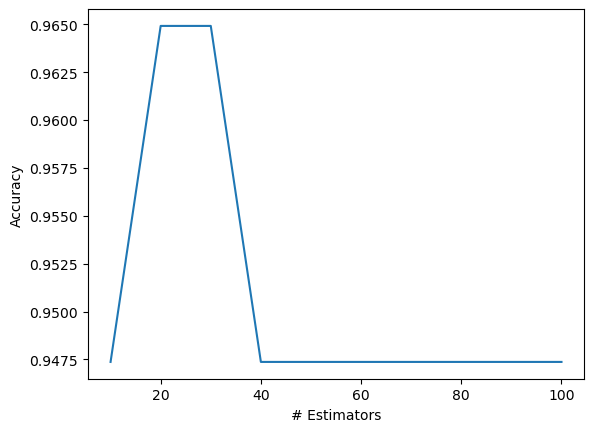

In [15]:
plt.plot(estimators,acc)
plt.xlabel("# Estimators")
plt.ylabel("Accuracy")

#### Feature importance

In [16]:
importances = model.feature_importances_

[Text(0, 0, 'Number'),
 Text(1, 0, 'MendeleevNumber'),
 Text(2, 0, 'AtomicWeight'),
 Text(3, 0, 'MeltingT'),
 Text(4, 0, 'Column'),
 Text(5, 0, 'Row'),
 Text(6, 0, 'CovalentRadius'),
 Text(7, 0, 'Electronegativity'),
 Text(8, 0, 'NsValence'),
 Text(9, 0, 'NpValence'),
 Text(10, 0, 'NdValence'),
 Text(11, 0, 'NfValence'),
 Text(12, 0, 'NValence'),
 Text(13, 0, 'NsUnfilled'),
 Text(14, 0, 'NpUnfilled'),
 Text(15, 0, 'NdUnfilled'),
 Text(16, 0, 'NfUnfilled'),
 Text(17, 0, 'NUnfilled'),
 Text(18, 0, 'GSvolume_pa'),
 Text(19, 0, 'GSbandgap'),
 Text(20, 0, 'GSmagmom'),
 Text(21, 0, 'SpaceGroupNumber')]

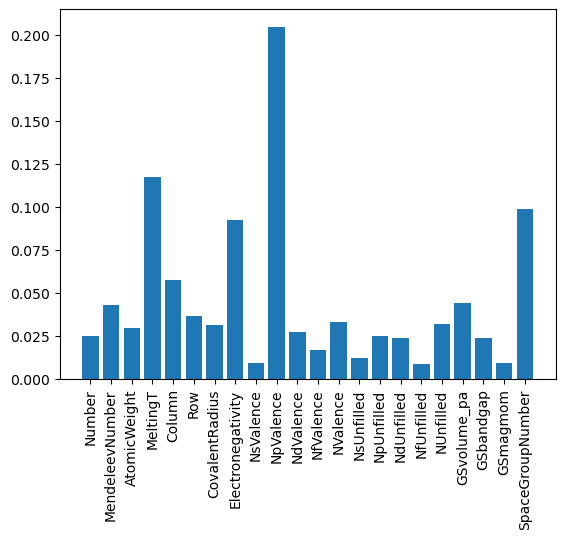

In [17]:
plt.bar(range(len(importances)),importances)
ax= plt.gca()
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns,rotation=90)

## Regression with Random Forest

We will use scikit-learn's RandomForestRegressor for regression. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for more information.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [19]:
# We are using the whole dataset

X = data.iloc[:,:-2]
y = data.iloc[:,-2]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators=100, criterion='squared_error',random_state=42)

In [21]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
predictions = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse} eV')

Mean Squared Error: 0.5313507012737496 eV


#### Variation in accuracy with the number of estimators.

In [24]:
estimators = np.arange(40,320,40)
acc = []
for e in estimators:
    model_e = RandomForestRegressor(n_estimators=e, criterion='squared_error',random_state=42)
    model_e.fit(X_train, y_train)
    predictions = model_e.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    acc.append(mse)
    

Text(0, 0.5, 'Accuracy')

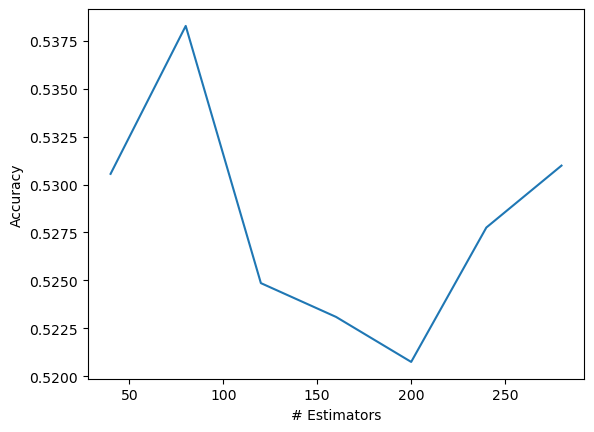

In [25]:
plt.plot(estimators,acc)
plt.xlabel("# Estimators")
plt.ylabel("Accuracy")

#### Feature importance

In [26]:
importances = model.feature_importances_

[Text(0, 0, 'Number'),
 Text(1, 0, 'MendeleevNumber'),
 Text(2, 0, 'AtomicWeight'),
 Text(3, 0, 'MeltingT'),
 Text(4, 0, 'Column'),
 Text(5, 0, 'Row'),
 Text(6, 0, 'CovalentRadius'),
 Text(7, 0, 'Electronegativity'),
 Text(8, 0, 'NsValence'),
 Text(9, 0, 'NpValence'),
 Text(10, 0, 'NdValence'),
 Text(11, 0, 'NfValence'),
 Text(12, 0, 'NValence'),
 Text(13, 0, 'NsUnfilled'),
 Text(14, 0, 'NpUnfilled'),
 Text(15, 0, 'NdUnfilled'),
 Text(16, 0, 'NfUnfilled'),
 Text(17, 0, 'NUnfilled'),
 Text(18, 0, 'GSvolume_pa'),
 Text(19, 0, 'GSbandgap'),
 Text(20, 0, 'GSmagmom'),
 Text(21, 0, 'SpaceGroupNumber')]

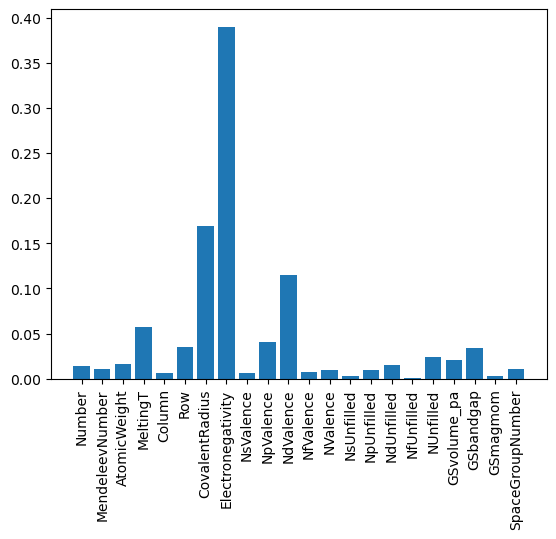

In [27]:
plt.bar(range(len(importances)),importances)
ax= plt.gca()
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(X.columns,rotation=90)